In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!cp '/content/drive/MyDrive/Dataset.zip' ./dataset.zip


In [8]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Copy Dataset.zip from Drive to Colab local storage
!cp '/content/drive/MyDrive/Dataset.zip' ./Dataset.zip

# Step 3: Unzip Dataset.zip to folder 'dataset'
import zipfile
with zipfile.ZipFile('Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

print("Dataset unzipped successfully!")

# Step 4: Check folder structure and image counts
import os

print("Classes and image counts:")
for folder_name in os.listdir('dataset'):
    folder_path = os.path.join('dataset', folder_name)
    if os.path.isdir(folder_path):
        num_images = len(os.listdir(folder_path))
        print(f"Class '{folder_name}': {num_images} images")

# Step 5: Load dataset with TensorFlow
import tensorflow as tf

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset',
    image_size=(224, 224),
    batch_size=32,
    label_mode='int',
    shuffle=True,
    seed=123
)

print("Detected classes:", train_ds.class_names)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset unzipped successfully!
Classes and image counts:
Class 'images.cv_jzk6llhf18tm3k0kyttxz': 2 images
Found 10504 files belonging to 1 classes.
Detected classes: ['images.cv_jzk6llhf18tm3k0kyttxz']


In [9]:
import os
import shutil

dataset_dir = 'dataset/images.cv_jzk6llhf18tm3k0kyttxz'
organized_dir = 'organized_dataset'

os.makedirs(organized_dir, exist_ok=True)

for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Extract class name from filename (e.g., "Salmon_001.jpg" -> "Salmon")
        class_name = filename.split('_')[0]
        class_folder = os.path.join(organized_dir, class_name)
        os.makedirs(class_folder, exist_ok=True)
        # Move image to class folder
        shutil.move(os.path.join(dataset_dir, filename), os.path.join(class_folder, filename))

print("Images reorganized into separate class folders.")


Images reorganized into separate class folders.


In [11]:
import os

root_dir = 'dataset/images.cv_jzk6llhf18tm3k0kyttxz'

print(f"Listing files inside: {root_dir}")

# List first 20 filenames
files = os.listdir(root_dir)
print(files[:20])


Listing files inside: dataset/images.cv_jzk6llhf18tm3k0kyttxz
['readme.txt', 'data']


In [12]:
data_dir = 'dataset/images.cv_jzk6llhf18tm3k0kyttxz/data'

print(f"Listing files inside: {data_dir}")
print(os.listdir(data_dir)[:20])  # Show first 20 files/folders


Listing files inside: dataset/images.cv_jzk6llhf18tm3k0kyttxz/data
['test', 'train', 'val']


In [13]:
train_path = 'dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int',
    shuffle=True,
    seed=123
)

print("Detected classes:", train_ds.class_names)


Found 6225 files belonging to 11 classes.
Detected classes: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


In [14]:
import os

print("Classes in train folder:")
print(os.listdir(train_path))


Classes in train folder:
['fish sea_food red_mullet', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food trout', 'fish sea_food black_sea_sprat', 'animal fish', 'fish sea_food gilt_head_bream', 'fish sea_food striped_red_mullet', 'animal fish bass', 'fish sea_food red_sea_bream', 'fish sea_food hourse_mackerel']


In [15]:
import tensorflow as tf

train_path = 'dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int',
    shuffle=True,
    seed=123
)

print("Detected classes:", train_ds.class_names)


Found 6225 files belonging to 11 classes.
Detected classes: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


In [16]:
val_path = 'dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val'
val_ds = tf.keras.preprocessing.image_dataset_from_directory(val_path, image_size=(224,224), batch_size=32, label_mode='int')

test_path = 'dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test'
test_ds = tf.keras.preprocessing.image_dataset_from_directory(test_path, image_size=(224,224), batch_size=32, label_mode='int')


Found 1092 files belonging to 11 classes.
Found 3187 files belonging to 11 classes.


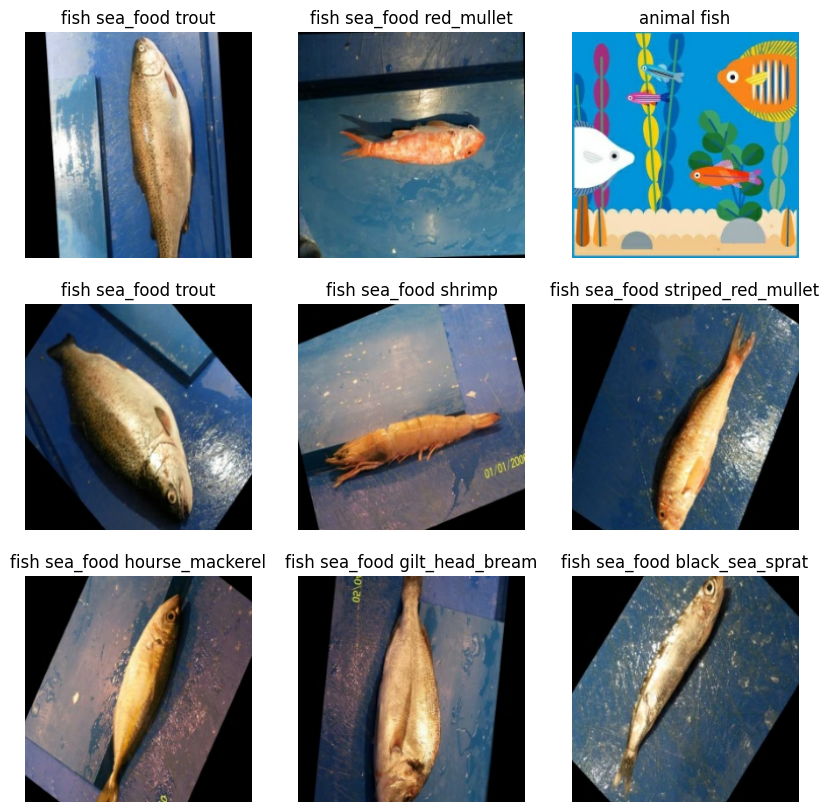

In [17]:
import matplotlib.pyplot as plt

class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


In [19]:
import tensorflow as tf

train_path = 'dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train'
val_path = 'dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val'
test_path = 'dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test'

batch_size = 32
img_size = (224, 224)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int',
    shuffle=True,
    seed=123
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int',
    shuffle=False
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int',
    shuffle=False
)

class_names = train_ds.class_names
print("Classes:", class_names)

AUTOTUNE = tf.data.AUTOTUNE

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

normalization_layer = tf.keras.layers.Rescaling(1./255)

def prepare_dataset(ds, training=False):
    ds = ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=AUTOTUNE)
    if training:
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)
        ds = ds.shuffle(1000)
    return ds.prefetch(buffer_size=AUTOTUNE)

train_ds = prepare_dataset(train_ds, training=True)
val_ds = prepare_dataset(val_ds)
test_ds = prepare_dataset(test_ds)


Found 6225 files belonging to 11 classes.
Found 1092 files belonging to 11 classes.
Found 3187 files belonging to 11 classes.
Classes: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


Step 2: Build and Train CNN from Scratch


In [7]:
import tensorflow as tf

train_path = 'dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train'
val_path = 'dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val'
test_path = 'dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test'

batch_size = 32
img_size = (224, 224)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int',
    shuffle=True,
    seed=123
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int',
    shuffle=False
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int',
    shuffle=False
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 6225 files belonging to 11 classes.
Found 1092 files belonging to 11 classes.
Found 3187 files belonging to 11 classes.
Classes: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


In [8]:
from tensorflow.keras import layers, models

num_classes = len(class_names)

model_scratch = models.Sequential([
    layers.InputLayer(input_shape=img_size + (3,)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])

model_scratch.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_scratch = model_scratch.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 779s 4s/step - accuracy: 0.4741 - loss: 32.1678 - val_accuracy: 0.7372 - val_loss: 0.8557
Epoch 2/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 796s 4s/step - accuracy: 0.7833 - loss: 0.7699 - val_accuracy: 0.8434 - val_loss: 0.5390
Epoch 3/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 806s 4s/step - accuracy: 0.9254 - loss: 0.2447 - val_accuracy: 0.8883 - val_loss: 0.5011


In [11]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [15]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, Model

# Normalization layer to scale pixels from [0,255] to [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Load EfficientNetB0 base model without top layer and with imagenet weights
base_model = EfficientNetB0(input_shape=img_size + (3,), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model initially

# Define input layer
inputs = layers.Input(shape=img_size + (3,))

# Pass inputs through normalization and augmentation layers
x = normalization_layer(inputs)
x = data_augmentation(x)  # Make sure data_augmentation is defined earlier

# Pass through the base EfficientNet model
x = base_model(x, training=False)

# Global average pooling
x = layers.GlobalAveragePooling2D()(x)

# Final dense layer with softmax for classification
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Build the model
model_tl = Model(inputs, outputs)

# Compile the model
model_tl.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with frozen base layers
history_tl = model_tl.fit(
    train_ds,
    validation_data=val_ds,
    epochs=1
)

# Unfreeze the last N layers for fine-tuning
base_model.trainable = True
fine_tune_at = 100  # Freeze all layers before this index

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Re-compile the model with a lower learning rate for fine-tuning
model_tl.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Continue training (fine-tuning)
history_ft = model_tl.fit(
    train_ds,
    validation_data=val_ds,
    epochs=1
)


195/195 ━━━━━━━━━━━━━━━━━━━━ 680s 3s/step - accuracy: 0.1688 - loss: 2.3356 - val_accuracy: 0.1712 - val_loss: 2.3344
195/195 ━━━━━━━━━━━━━━━━━━━━ 1189s 6s/step - accuracy: 0.0544 - loss: 2.5642 - val_accuracy: 0.0907 - val_loss: 2.3579


In [16]:
model_tl.save('fish_classifier_effnetb0.h5')
print("Model saved as fish_classifier_effnetb0.h5")


Model saved as fish_classifier_effnetb0.h5


100/100 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step
                                  precision    recall  f1-score   support

                     animal fish       0.14      0.18      0.16       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.17      0.21      0.19       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.00      0.00      0.00       286
        fish sea_food red_mullet       0.00      0.00      0.00       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.00      0.00      0.00       289
fish sea_food striped_red_mullet       0.00      0.00      0.00       293
             fish sea_food trout       0.06      0.42      0.10       292

                        accuracy                           0.09     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


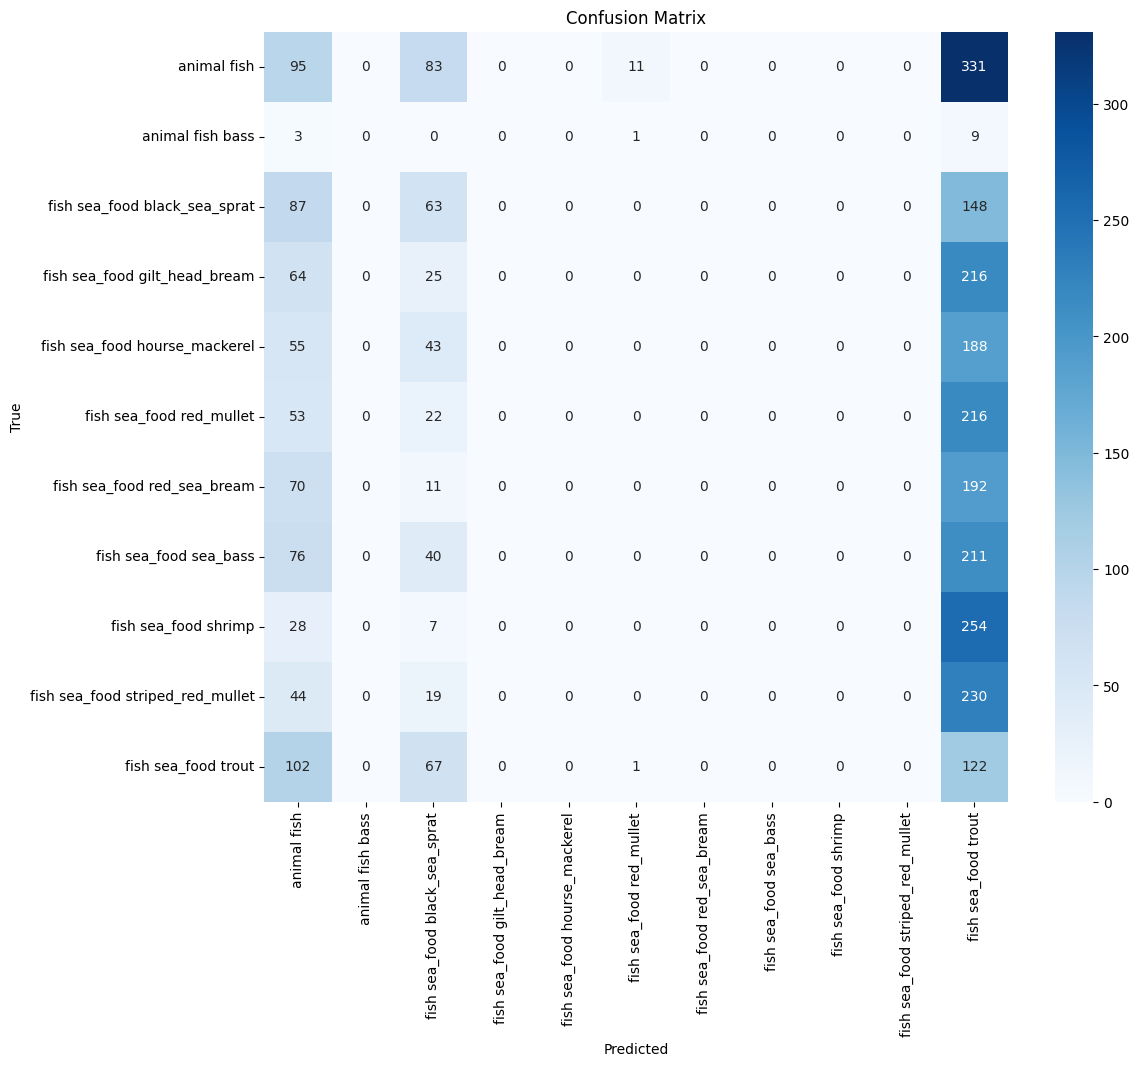

In [17]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Collect true labels from test dataset
y_true = np.concatenate([y.numpy() for x, y in test_ds], axis=0)

# Predict probabilities for test dataset
y_pred_prob = model_tl.predict(test_ds)

# Convert probabilities to predicted class indices
y_pred = np.argmax(y_pred_prob, axis=1)

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot confusion matrix heatmap
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix'
plt.show()


In [19]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


In [20]:
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
model = load_model('fish_classifier_effnetb0.h5')

# Paste your class names list here
class_names = ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']

st.title("Fish Image Classification")

uploaded_file = st.file_uploader("Upload a fish image", type=['jpg', 'png'])

if uploaded_file is not None:
    img = image.load_img(uploaded_file, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    score = np.max(predictions)
    predicted_class = class_names[np.argmax(predictions)]

    st.image(img, caption='Uploaded Image', use_column_width=True)
    st.write(f"Prediction: **{predicted_class}**")
    st.write(f"Confidence: {score:.2%}")


2025-08-10 20:58:31.983 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 20:58:32.216 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-08-10 20:58:32.218 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 20:58:32.220 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 20:58:32.223 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 20:58:32.225 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 20:58:32.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 20:58:32.229 Thread 'MainThread': mi

In [22]:
from google.colab import files
files.download('fish_classifier_effnetb0.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
code = '''# -*- coding: utf-8 -*-
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model (make sure fish_classifier_effnetb0.h5 is in the same folder)
model = load_model('fish_classifier_effnetb0.h5')

# List of class names
class_names = [
    'animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat',
    'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel',
    'fish sea_food red_mullet', 'fish sea_food red_sea_bream',
    'fish sea_food sea_bass', 'fish sea_food shrimp',
    'fish sea_food striped_red_mullet', 'fish sea_food trout'
]

st.title("Fish Image Classification")

uploaded_file = st.file_uploader("Upload a fish image", type=['jpg', 'png'])

if uploaded_file is not None:
    # Load image with target size
    img = image.load_img(uploaded_file, target_size=(224, 224))

    # Convert to numpy array and normalize
    img_array = image.img_to_array(img) / 255.0

    # Add batch dimension for model input
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array)

    # Show uploaded image
    st.image(img, caption='Uploaded Image', use_column_width=True)

    # Get top 3 predictions
    top3_indices = predictions[0].argsort()[-3:][::-1]

    # Display top 3 predictions with confidence
    for i in top3_indices:
        st.write(f"{class_names[i]}: {predictions[0][i]*100:.2f}%")
'''

with open('app.py', 'w') as f:
    f.write(code)

from google.colab import files
files.download('app.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files

# Upload model file
print("Upload fish_classifier_effnetb0.h5 model file")
model_file = files.upload()

# Load the model
model = load_model('fish_classifier_effnetb0.h5')

# List of class names (make sure this matches your original labels)
class_names = [
    'animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat',
    'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel',
    'fish sea_food red_mullet', 'fish sea_food red_sea_bream',
    'fish sea_food sea_bass', 'fish sea_food shrimp',
    'fish sea_food striped_red_mullet', 'fish sea_food trout'
]

# Upload test image
print("Upload a fish image file to test")
img_file = files.upload()

# Assuming one image uploaded, get the filename
img_path = list(img_file.keys())[0]

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
predictions = model.predict(img_array)
score = np.max(predictions)
predicted_class = class_names[np.argmax(predictions)]

print(f"Prediction: {predicted_class}")
print(f"Confidence: {score:.2%}")


Upload fish_classifier_effnetb0.h5 model file


Saving Image 11-08-25 at 3.25 AM.jpeg to Image 11-08-25 at 3.25 AM (1).jpeg


Upload a fish image file to test


Saving Image 11-08-25 at 3.25 AM.jpeg to Image 11-08-25 at 3.25 AM (2).jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction: fish sea_food hourse_mackerel
Confidence: 14.37%


In [27]:
print("All prediction scores:", predictions)


All prediction scores: [[0.13938515 0.01974364 0.14065163 0.08371291 0.14367752 0.08135308
  0.04675891 0.08520177 0.0816836  0.09841774 0.07941411]]


In [30]:
code = '''streamlit
tensorflow
numpy
pillow
'''

with open('requirements.txt', 'w') as f:
    f.write(code)

from google.colab import files
files.download('requirements.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
readme_text = '''# Fish Image Classification

A project to classify fish images using a trained deep learning model and Streamlit app.

---

## How to install

1. Clone this repo (or download files):

   git clone https://github.com/yourusername/fish-image-classification.git
   cd fish-image-classification

2. Install Python libraries:

   pip install -r requirements.txt

---

## How to run the app

Make sure `fish_classifier_effnetb0.h5` is in the folder, then run:

   streamlit run app.py

Open your browser at http://localhost:8501

---

## How to retrain or use the notebook

Open `Fish_Classification_Notebook.ipynb` in Jupyter or Google Colab to train or test the model.
'''

with open('README.md', 'w') as f:
    f.write(readme_text)

from google.colab import files
files.download('README.md')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
gitignore_text = '''__pycache__/
*.pyc
.ipynb_checkpoints/
*.h5
.env
'''

with open('.gitignore', 'w') as f:
    f.write(gitignore_text)

from google.colab import files
files.download('.gitignore')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>